**Objective:**\
Product reviews reveal customer sentiments helping the manufacturers decide what is required to make the product a success. Depending on the reviews provided by the users, the product is classified as good or bad and improvements can be made accordingly to cater to the requirements of the customers.


**Steps followed:**

    Install the required package
    Load the required libraries
    Load the dataset and assign the column names
    Data cleaning
    Creating polarity of textual data (NLP)
    Analyze the dataset
    Splitting of data
    Build Popularity based model
    Tune the parameters - cross val score
    Cluster based model
    Future tred of data - Time series
    Compare and conclude the best model

### Install Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn import preprocessing
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.cluster import KMeans
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

#time series lib
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df=pd.read_csv('new_combine_clean.csv') # reading file 
df.head()                               # to get only first five data

,Unnamed: 0,asin,title,price,salesRank,brand,categories,description,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,helpful_ratio,help_cat
0,0,0000031887,Ballet Dress-Up Fairy Tutu,7,{'Sports &amp; Outdoors': 8547},Boutique Cutie,clothing shoes & jewelry girls clothing activ...,This adorable basic ballerina tutu is perfect ...,A1KLRMWW2FWPL4,"Amazon Customer ""cameramom""",This is a great tutu and at a really great pri...,5,great tutu not cheaply made,2011-02-12,0.0,not_helpful
1,1,0000031887,Ballet Dress-Up Fairy Tutu,7,{'Sports &amp; Outdoors': 8547},Boutique Cutie,clothing shoes & jewelry girls clothing activ...,This adorable basic ballerina tutu is perfect ...,A2G5TCU2WDFZ65,Amazon Customer,I bought this for my 4 yr old daughter for dan...,5,very cute,2013-01-19,0.0,not_helpful
2,2,0000031887,Ballet Dress-Up Fairy Tutu,7,{'Sports &amp; Outdoors': 8547},Boutique Cutie,clothing shoes & jewelry girls clothing activ...,This adorable basic ballerina tutu is perfect ...,A1RLQXYNCMWRWN,Carola,What can I say... my daughters have it in oran...,5,i have buy more than one,2013-01-04,0.0,not_helpful
3,3,0000031887,Ballet Dress-Up Fairy Tutu,7,{'Sports &amp; Outdoors': 8547},Boutique Cutie,clothing shoes & jewelry girls clothing activ...,This adorable basic ballerina tutu is perfect ...,A8U3FAMSJVHS5,Caromcg,"We bought several tutus at once, and they are ...",5,adorable sturdy,2014-04-27,0.0,not_helpful
4,4,0000031887,Ballet Dress-Up Fairy Tutu,7,{'Sports &amp; Outdoors': 8547},Boutique Cutie,clothing shoes & jewelry girls clothing activ...,This adorable basic ballerina tutu is perfect ...,A3GEOILWLK86XM,CJ,Thank you Halo Heaven great product for Little...,5,grammy s angels love it,2014-03-15,0.0,not_helpful


### Shape of dataFrame

In [3]:
df.shape                                    # shape of our dataframe

(278677, 16)

Here we can observe that 278677 row and 16 columns are present in our data

### Missing value in our data

In [4]:
df.isnull().sum()                            # To know how many null values present in our data

Unnamed: 0            0
asin                  0
title               268
price                 0
salesRank         12381
brand            230104
categories            0
description      263215
reviewerID            0
reviewerName        469
reviewText           24
overall               0
summary               1
reviewTime            0
helpful_ratio         0
help_cat              0
dtype: int64

In [5]:
df=df.sort_values(by='reviewTime')             # to sort date column in ascending order
df.head()                                      # to get only first five data

,Unnamed: 0,asin,title,price,salesRank,brand,categories,description,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,helpful_ratio,help_cat
3367,3367,B0000ZEPGA,Bali Women's Double-Support Wire-Free Bra #3820,25,{'Clothing': 327},NaN,clothing shoes & jewelry women clothing linge...,NaN,A1X2LENOF84LCQ,"D ""D""",This bra is the most comfortable bra I have ev...,5,this bra is the most comfortable,2003-03-29,1.0,most_helpful
145,145,B000051SEP,Suunto X-Lander Wrist-Top Computer Watch with ...,329,{'Sports &amp; Outdoors': 28265},Suunto,clothing shoes & jewelry men watches wrist wa...,The ultimate option for the outdoor enthusiast...,A1GPGBHBI6T2HJ,"Jeff Edwards ""RadioJeff""","I collect watches, and I am NOT one to shy awa...",5,a fantastic gadget for those of us who like co...,2003-12-12,1.0,most_helpful
13190,13190,B0007YXUS8,Playtex Women's Secrets Signature Floral Bra,25,{'Clothing': 1670},NaN,clothing shoes & jewelry women clothing linge...,NaN,A1Z54EM24Y40LL,csm,I just love this bra. I was first introduced ...,5,absolutely my favorite,2004-07-17,1.0,most_helpful
2032,2032,B0000B35EL,Duragold 14k Gold 6mm Ball Stud Earrings,34,{'Jewelry': 18408},NaN,clothing shoes & jewelry jewelry internationa...,NaN,A2K3J2X8KDY47N,"Jewelry Lover ""me""",for $10 these were too good to pass up. First...,2,quality is slipping,2004-09-24,2.0,not_helpful
1963,1963,B0000B35D9,Duragold 14k Gold Hoop Earrings (1&quot; Diame...,68,{'Jewelry': 526},NaN,clothing shoes & jewelry gifts jewelry gifts ...,NaN,AB2YZA2HLY75H,Reb,"I purchased these for a teenage cousin, and th...",5,agree with momof2,2004-09-29,1.0,most_helpful


In [6]:
df=df.drop(['brand','description'],axis=1) # droping brand and description column because brand column contain 82.57 % blank data
                                           # And description column contain 94.45% blank column
df=df.dropna()                             # droping all missing value(i.e 3%) beacuse by droping this it will not affect the whole dataset
df=df.reset_index()                        # After droping value resting the index in proper manner
df=df.drop(['index','Unnamed: 0'],axis=1)  # droping column with name index and unname 

In [7]:
df.isnull().sum()                           # cheack wheather data contain missing value or not

asin             0
title            0
price            0
salesRank        0
categories       0
reviewerID       0
reviewerName     0
reviewText       0
overall          0
summary          0
reviewTime       0
helpful_ratio    0
help_cat         0
dtype: int64

In [8]:
df.shape                             # shape of our dataframe

(265591, 13)

#### Data cleaning

In [9]:
df['sub_cat'] = df['salesRank'].str.split(':')          # spliting of data
df['sub_cate'] = df['sub_cat'].str.get(0)               # after spliting taking only 0th position data from list
df['sub_cat12'] = df['sub_cate'].str.split('{')         # spliting of data
df['sub_cate'] = df['sub_cat12'].str.get(1)             # after spliting taking only 1st position data from list
df['sub_cat12'] = df['sub_cate'].str.split("'")         # spliting of data
df['sub_cate'] = df['sub_cat12'].str.get(1)             # after spliting taking only 1st position data from list
df['rank'] = df['sub_cat'].str.get(1)                   # after spliting taking only 1st position data from list
df['rank12'] = df['rank'].str.split('}')                # spliting of data
df['rank'] = df['rank12'].str.get(0)                    # after spliting taking only 0th position data from list
df=df.drop(['sub_cat','sub_cat12','rank12'],axis=1)     # droping not required columns
df.head()                                               # to get only first five rows of data

,asin,title,price,salesRank,categories,reviewerID,reviewerName,reviewText,overall,summary,reviewTime,helpful_ratio,help_cat,sub_cate,rank
0,B0000ZEPGA,Bali Women's Double-Support Wire-Free Bra #3820,25,{'Clothing': 327},clothing shoes & jewelry women clothing linge...,A1X2LENOF84LCQ,"D ""D""",This bra is the most comfortable bra I have ev...,5,this bra is the most comfortable,2003-03-29,1.0,most_helpful,Clothing,327
1,B000051SEP,Suunto X-Lander Wrist-Top Computer Watch with ...,329,{'Sports &amp; Outdoors': 28265},clothing shoes & jewelry men watches wrist wa...,A1GPGBHBI6T2HJ,"Jeff Edwards ""RadioJeff""","I collect watches, and I am NOT one to shy awa...",5,a fantastic gadget for those of us who like co...,2003-12-12,1.0,most_helpful,Sports &amp; Outdoors,28265
2,B0007YXUS8,Playtex Women's Secrets Signature Floral Bra,25,{'Clothing': 1670},clothing shoes & jewelry women clothing linge...,A1Z54EM24Y40LL,csm,I just love this bra. I was first introduced ...,5,absolutely my favorite,2004-07-17,1.0,most_helpful,Clothing,1670
3,B0000B35EL,Duragold 14k Gold 6mm Ball Stud Earrings,34,{'Jewelry': 18408},clothing shoes & jewelry jewelry internationa...,A2K3J2X8KDY47N,"Jewelry Lover ""me""",for $10 these were too good to pass up. First...,2,quality is slipping,2004-09-24,2.0,not_helpful,Jewelry,18408
4,B0000B35D9,Duragold 14k Gold Hoop Earrings (1&quot; Diame...,68,{'Jewelry': 526},clothing shoes & jewelry gifts jewelry gifts ...,AB2YZA2HLY75H,Reb,"I purchased these for a teenage cousin, and th...",5,agree with momof2,2004-09-29,1.0,most_helpful,Jewelry,526


In [10]:
df['sub_cate'].unique()                          # checking unique values in sub_cate column

array(['Clothing', 'Sports &amp; Outdoors', 'Jewelry', 'Toys & Games',
       'Watches', 'Shoes', nan, 'Camera &amp; Photo',
       'Health & Personal Care', 'Home &amp; Kitchen',
       'Arts, Crafts & Sewing', 'Beauty', 'Industrial & Scientific',
       'Patio, Lawn & Garden', 'Home Improvement', 'Kitchen & Dining',
       'Computers & Accessories', 'Electronics', 'Baby',
       'Cell Phones & Accessories'], dtype=object)

In [11]:
df=df.rename(columns={'title':"product_name"})   # renaming of column 
df=df.drop(['reviewText','salesRank'],axis=1)    # droping not required column

#### Checking unique asin and product name present in data

In [12]:
print("Unique asin         :",len(df['asin'].unique()))           # unique asin number
print('unique product name :',len(df['product_name'].unique()))   # unique product name

Unique asin         : 21900
unique product name : 21702


<h1><center>SentimentIntensityAnalyzer</center></h1>

In [13]:
sid = SentimentIntensityAnalyzer()  

In [14]:
df['scores'] = df['summary'].apply(lambda review: sid.polarity_scores(review))  # Score of our date in numeric form
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound']) # Taking specific value from score
df.loc[df.compound>=0.05,'Sentiment_Type']='positive'                           # giving condition for positive value
df.loc[(df.compound>-0.05) & (df.compound<0.05),'Sentiment_Type']='neutral'     # giving condition for netural value
df.loc[df.compound<=-0.05,'Sentiment_Type']='negative'                          # giving condition for negative value

### Converting textual data into numeric data

In [15]:
label_encoder = preprocessing.LabelEncoder() # encoder function
df['Sentiment_Type11']= label_encoder.fit_transform(df['Sentiment_Type']) # Encode labels in column 'Sentiment_Type'.

In [16]:
df=df.drop(['scores'],axis=1)                     # droping not required column

#### Count of unique word in each row

In [17]:
df['rev_word_count']= df['summary'].apply(lambda x: len(x.strip().split()))      # Count of word
df['unique_word_count']= df['summary'].apply(lambda x: len(set(str(x).split()))) # Unique count of word

### Count of positive negative and neutral data

In [18]:
df['Sentiment_Type'].value_counts()  # each category value count

positive    174172
neutral      74582
negative     16837
Name: Sentiment_Type, dtype: int64

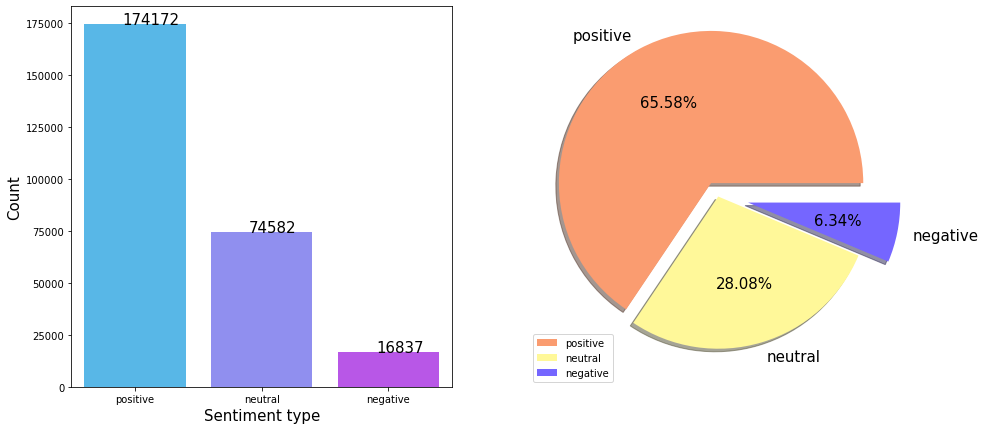

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))          # size of plot
#ax[0].set_title("Review Distribution",size=20)           # giving title to plot      
percentage = df["Sentiment_Type"].value_counts()         
labels = list(df["Sentiment_Type"].value_counts().index) 
colors = ['#fa9c70','#fff899','#7566ff']
ab=sns.countplot(x = df["Sentiment_Type"], ax = ax[0],palette='cool')
ax[0].set_xlabel("Sentiment type",size=15)
ax[0].set_ylabel("Count",size=15)

for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)

plt.pie(percentage,labels = labels ,explode=[0.1,0,0.2],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
#plt.title('Review ')
plt.legend()
plt.savefig("clothing_distribution.png", format="png")
plt.show()



## Model Building

In [20]:
data = df.copy()                   # creating copy of dataframe

In [21]:
data=data.drop(['asin', 'price', 'categories', 'reviewerID',       # Taking dependent and independent column
       'reviewerName', 'overall', 'reviewTime', 'helpful_ratio',
       'help_cat', 'sub_cate', 'rank', 'compound', 'Sentiment_Type',
       'rev_word_count', 'unique_word_count'],axis=1)
data.head()                                                       # to get only first five rows of data

,product_name,summary,Sentiment_Type11
0,Bali Women's Double-Support Wire-Free Bra #3820,this bra is the most comfortable,2
1,Suunto X-Lander Wrist-Top Computer Watch with ...,a fantastic gadget for those of us who like co...,2
2,Playtex Women's Secrets Signature Floral Bra,absolutely my favorite,2
3,Duragold 14k Gold 6mm Ball Stud Earrings,quality is slipping,1
4,Duragold 14k Gold Hoop Earrings (1&quot; Diame...,agree with momof2,2


<h1><center> Spliting of data in train and test part</center></h1>

**Here we are considering training data as 66.66 % and testing data as 33.33%**

In [22]:
x_train,x_test,y_train,y_test=train_test_split(data['summary'],data['Sentiment_Type11'],test_size=0.33,random_state=42)

In [23]:
a=x_test
b=y_test

**Tf-idf**\
This method is called the TF-IDF stands for “Term Frequency – Inverse Document Frequency ”. TF-IDF is a numerical statistic which measures the importance of the word in a document. Term Frequency: Number of time a word appears in a text document

In [24]:
tf=TfidfVectorizer(sublinear_tf=True, 
                            max_df=0.5, 
                            min_df=1,
                            stop_words=stopwords.words('english'),
                            use_idf=True )
x_train=tf.fit_transform(x_train)          # transforming the train data
x_test=tf.transform(x_test)                # transforming the test data

### Logistic Regression

In [25]:
lr=LogisticRegression(max_iter=50)   # logistic regression model lib
ovr=OneVsRestClassifier(lr)          # one vs rest classifier due to multilabel class
ovr.fit(x_train,y_train)
y_pred = ovr.predict(x_test)         # predicting the model

In [26]:
f1= f1_score(y_test,y_pred,average='weighted') # class is inbalance thats why we are using f1 score to get performance
print('F1 score for logistic regression model :',round(f1*100,2),'%')

F1 score for logistic regression model : 95.05 %


## Naive bayes - MultinomialNB

In [27]:
Naive = MultinomialNB()                  # multinomial model lib
model =Naive.fit(x_train,y_train)        # fitting of model
predictions_NB = Naive.predict(x_test)   # prediction of model
print("Naive Bayes Accuracy Score : ",accuracy_score(predictions_NB, y_test)*100)
print("Naive Bayes F1 score : ",f1_score(predictions_NB, y_test,average='weighted')*100)

Naive Bayes Accuracy Score :  85.50304634552633
Naive Bayes F1 score :  86.81784412978413


## Cross val score

In [28]:
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=1, random_state=42)
f1_score = cross_val_score(estimator = Naive, X = x_train, y = y_train, cv = cv,scoring='f1_weighted')
print('F1 score :',f1_score.mean()*100)

F1 score : 84.4264450789587


### Roc Auc curve

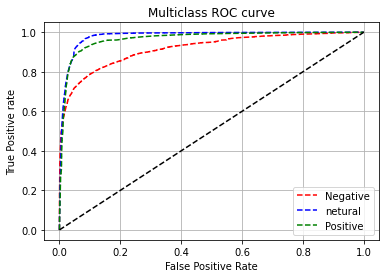

In [29]:
pred_prob = model.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Negative')
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='netural')
plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Positive')
plt.plot([0, 1], [0, 1], 'k--')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.grid()
plt.legend(loc='best')
# plt.savefig('Multiclass ROC',dpi=300);

### Confusion Matrix

array([[ 2009,   519,  3083],
       [   37, 15967,  8368],
       [  120,   579, 56964]], dtype=int64)

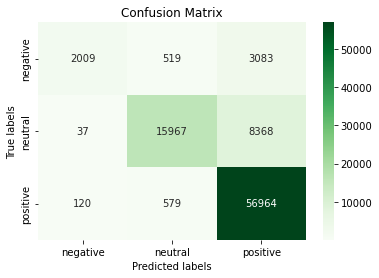

In [30]:
ax= plt.subplot()
cm=confusion_matrix(y_test, predictions_NB)     # lib for confusion matrix
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'neutral','positive']); 
ax.yaxis.set_ticklabels(['negative', 'neutral','positive']);
cm

### Actual and predicted value

In [31]:
dff=pd.DataFrame()            # creating dataframe for actual and predicted value
dff['review']=a
dff['Actual']=b
dff['pred']=predictions_NB
dff

,review,Actual,pred
196093,cheap fabric,1,1
139094,the legs are so tight that they looked like jo...,2,2
264689,i ended up giving it to my daughter who loved it,2,2
177639,bigger,1,1
45180,very thin,1,1
...,...,...,...
51472,perfect bag,2,2
8707,trav lin woman,1,1
114219,length too long for me,1,2
111084,highly dramatic and reasonably well made,2,2


### Clustring

<AxesSubplot:xlabel='compound', ylabel='price'>

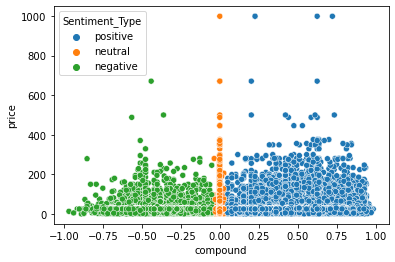

In [32]:
sns.scatterplot(df['compound'],df['price'],hue=df['Sentiment_Type'],data=df)

In [33]:
df_clu=df[['compound','price']]   # Taking only compound and price column
df_clu

,compound,price
0,0.5563,25
1,0.8126,329
2,0.5070,25
3,0.0000,34
4,0.3612,68
...,...,...
265586,0.0000,5
265587,0.4588,5
265588,0.8591,4
265589,0.0000,11


### Elbow curve

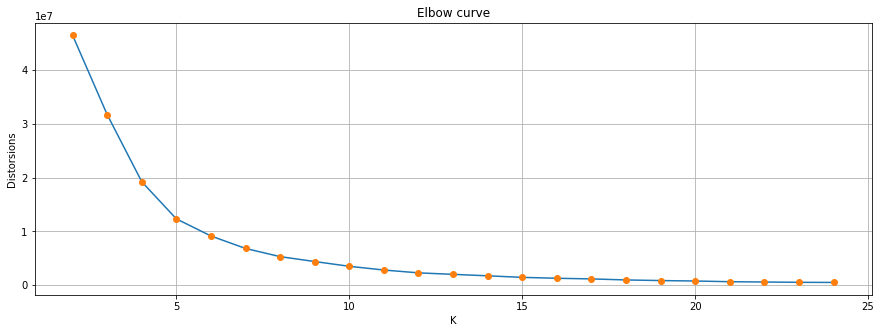

In [34]:
kk=[]                                    # empty list created
distorsions = []                         # empty list created
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k)        # kmean lib is used 
    kmeans.fit(df_clu)
    distorsions.append(kmeans.inertia_)
    kk.append(k)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 25), distorsions)
plt.plot(kk,distorsions,'o')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [35]:
# from sklearn.metrics import silhouette_samples, silhouette_score
# import matplotlib.cm as cm
# import numpy as np

# range_n_clusters = [3, 4, 5, 6, 7]

# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(df_clu)

#     silhouette_avg = silhouette_score(df_clu, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)

In [36]:
cluster_model = KMeans(n_clusters=5)   # best silhoutte score 
pre_cluster=cluster_model.fit_predict(df_clu)
pre_cluster

array([0, 1, 0, ..., 3, 3, 0])

In [37]:
df['cluster_pre']=pre_cluster

In [38]:
df['cluster_pre'].unique()

array([0, 1, 2, 4, 3])

In [39]:
X = df.iloc[:, [13, 2]].values  # here we are taking compound and price column
xx=pd.DataFrame(X)
xx

,0,1
0,0.5563,25.0
1,0.8126,329.0
2,0.5070,25.0
3,0.0000,34.0
4,0.3612,68.0
...,...,...
265586,0.0000,5.0
265587,0.4588,5.0
265588,0.8591,4.0
265589,0.0000,11.0


### Cluster based modeling

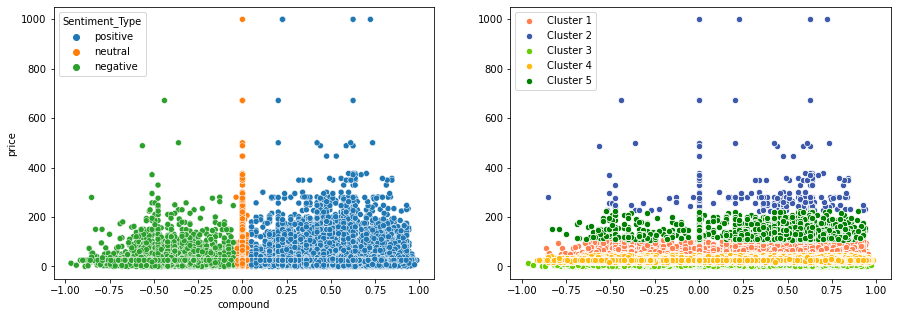

In [40]:
# both graph should be explained when new data is imported
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(df['compound'],df['price'],hue=df['Sentiment_Type'],c=cluster_model.predict(df_clu))
plt.subplot(122)
plt.scatter(X[pre_cluster == 2, 0], X[pre_cluster == 2, 1], s = 40 ,c = '#FF7F50',edgecolors='white',linewidth=0.8, label = 'Cluster 1')
plt.scatter(X[pre_cluster == 1, 0], X[pre_cluster == 1, 1], s = 40 ,c = '#3D59AB',edgecolors='white',linewidth=0.8, label = 'Cluster 2')
plt.scatter(X[pre_cluster == 3, 0], X[pre_cluster == 3, 1], s = 40 ,c = '#66CD00',edgecolors='white',linewidth=0.8, label = 'Cluster 3')
plt.scatter(X[pre_cluster == 0, 0], X[pre_cluster == 0, 1], s = 40 ,c = '#FFB90F',edgecolors='white',linewidth=0.8, label = 'Cluster 4')
plt.scatter(X[pre_cluster == 4, 0], X[pre_cluster == 4, 1], s = 40 ,c = 'green',edgecolors='white',linewidth=0.8, label = 'Cluster 5')
plt.legend()
plt.show()

### Churn customer yes , no and not sure

In [41]:
conditions = [(df['Sentiment_Type']=='positive') & (df['overall']>3.5),
              (df['Sentiment_Type']=='negative') & (df['overall']<2.5), 
             ((df['Sentiment_Type']=='neutral') & (df['overall']>2.5) & (df['Sentiment_Type']=='neutral') & (df['overall']<3.5))]

# create a list of the values we want to assign for each condition
values = ['no', 'yes', 'not sure']

# create a new column and use np.select to assign values to it using our lists as arguments
df['churn_yes_no'] = np.select(conditions, values)

# display updated DataFrame
df.head()
 

,asin,product_name,price,categories,reviewerID,reviewerName,overall,summary,reviewTime,helpful_ratio,help_cat,sub_cate,rank,compound,Sentiment_Type,Sentiment_Type11,rev_word_count,unique_word_count,cluster_pre,churn_yes_no
0,B0000ZEPGA,Bali Women's Double-Support Wire-Free Bra #3820,25,clothing shoes & jewelry women clothing linge...,A1X2LENOF84LCQ,"D ""D""",5,this bra is the most comfortable,2003-03-29,1.0,most_helpful,Clothing,327,0.5563,positive,2,6,6,0,no
1,B000051SEP,Suunto X-Lander Wrist-Top Computer Watch with ...,329,clothing shoes & jewelry men watches wrist wa...,A1GPGBHBI6T2HJ,"Jeff Edwards ""RadioJeff""",5,a fantastic gadget for those of us who like co...,2003-12-12,1.0,most_helpful,Sports &amp; Outdoors,28265,0.8126,positive,2,11,11,1,no
2,B0007YXUS8,Playtex Women's Secrets Signature Floral Bra,25,clothing shoes & jewelry women clothing linge...,A1Z54EM24Y40LL,csm,5,absolutely my favorite,2004-07-17,1.0,most_helpful,Clothing,1670,0.5070,positive,2,3,3,0,no
3,B0000B35EL,Duragold 14k Gold 6mm Ball Stud Earrings,34,clothing shoes & jewelry jewelry internationa...,A2K3J2X8KDY47N,"Jewelry Lover ""me""",2,quality is slipping,2004-09-24,2.0,not_helpful,Jewelry,18408,0.0000,neutral,1,3,3,0,0
4,B0000B35D9,Duragold 14k Gold Hoop Earrings (1&quot; Diame...,68,clothing shoes & jewelry gifts jewelry gifts ...,AB2YZA2HLY75H,Reb,5,agree with momof2,2004-09-29,1.0,most_helpful,Jewelry,526,0.3612,positive,2,3,3,2,no


In [42]:
df['churn_yes_no'].value_counts()  # Count of churn customer

no          156917
0            88168
not sure     12295
yes           8211
Name: churn_yes_no, dtype: int64

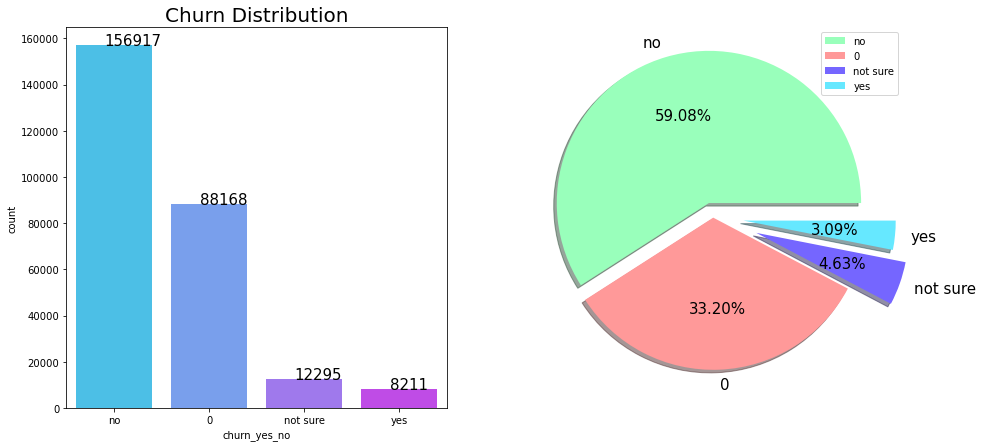

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))          # size of plot
ax[0].set_title("Churn Distribution",size=20)           # giving title to plot      
percentage = df["churn_yes_no"].value_counts()         
labels = list(df["churn_yes_no"].value_counts().index) 
colors = ['#99ffbb','#ff9999','#7566ff','#66e8ff']
ab=sb.countplot(x = df["churn_yes_no"], ax = ax[0],palette='cool')
for p in ab.patches:
    ab.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.05),fontsize=15)
plt.pie(percentage,labels = labels ,explode=[0.1,0,0.3,0.2],autopct= "%0.2f%%",shadow=True,colors=colors,textprops={'fontsize': 15})
plt.legend()
# plt.savefig("distribution.png", format="png")
plt.show()

In [44]:
df['churn_yes_no']=df['churn_yes_no'].replace('0','miss guide review')

In [45]:
df.to_csv('final_2new_combine.csv') # saving of file

## Time series

In [46]:
df=pd.read_csv("final_2new_combine.csv",parse_dates=['reviewTime'],index_col="reviewTime")
df.head()

,Unnamed: 0,asin,product_name,price,categories,reviewerID,reviewerName,overall,summary,helpful_ratio,help_cat,sub_cate,rank,compound,Sentiment_Type,Sentiment_Type11,rev_word_count,unique_word_count,cluster_pre,churn_yes_no
reviewTime,,,,,,,,,,,,,,,,,,,,
2003-03-29,0,B0000ZEPGA,Bali Women's Double-Support Wire-Free Bra #3820,25,clothing shoes & jewelry women clothing linge...,A1X2LENOF84LCQ,"D ""D""",5,this bra is the most comfortable,1.0,most_helpful,Clothing,327.0,0.5563,positive,2,6,6,0,no
2003-12-12,1,B000051SEP,Suunto X-Lander Wrist-Top Computer Watch with ...,329,clothing shoes & jewelry men watches wrist wa...,A1GPGBHBI6T2HJ,"Jeff Edwards ""RadioJeff""",5,a fantastic gadget for those of us who like co...,1.0,most_helpful,Sports &amp; Outdoors,28265.0,0.8126,positive,2,11,11,1,no
2004-07-17,2,B0007YXUS8,Playtex Women's Secrets Signature Floral Bra,25,clothing shoes & jewelry women clothing linge...,A1Z54EM24Y40LL,csm,5,absolutely my favorite,1.0,most_helpful,Clothing,1670.0,0.5070,positive,2,3,3,0,no
2004-09-24,3,B0000B35EL,Duragold 14k Gold 6mm Ball Stud Earrings,34,clothing shoes & jewelry jewelry internationa...,A2K3J2X8KDY47N,"Jewelry Lover ""me""",2,quality is slipping,2.0,not_helpful,Jewelry,18408.0,0.0000,neutral,1,3,3,0,miss guide review
2004-09-29,4,B0000B35D9,Duragold 14k Gold Hoop Earrings (1&quot; Diame...,68,clothing shoes & jewelry gifts jewelry gifts ...,AB2YZA2HLY75H,Reb,5,agree with momof2,1.0,most_helpful,Jewelry,526.0,0.3612,positive,2,3,3,2,no


In [47]:
df1=df[df['Sentiment_Type']=='positive'] # featching data only for positive sentiment
df2=df[df['Sentiment_Type']=='negative'] # featching data only for negative sentiment
df3=df[df['Sentiment_Type']=='neutral']  # featching data only for neutral sentiment
print("Positive:{} , Negative:{} , Neutral:{}".format(df1.shape,df2.shape,df3.shape)) # checking shape of all data 

Positive:(174172, 20) , Negative:(16837, 20) , Neutral:(74582, 20)


## Filling Missing values with the help of INTERPOLATE
    It is mostly used in time series data. In backward fill, the missing value is imputed using the next value. Missing values can also be imputed using interpolation. Pandas interpolate method can be used to replace the missing values with different interpolation methods like 'polynomial', 'linear', 'quadratic'.

In [48]:
#function for resampleing the data into months then ploting its actual,trend, seasonality,residual plots with acf & pacf plot

def resample(data,lag):
    global data_s,data_w,d_seasonal,traint,testt,train,test
    
#resample data into months
    data_s=data.resample('m').mean()                                  
    
#imputing missing values with the help of interpolate
    data_s['overall'].interpolate(method="linear",inplace=True)
    data_s['helpful_ratio'].interpolate(method="linear",inplace=True)
    data_s['price'].interpolate(method="linear",inplace=True)
    data_s['compound'].interpolate(method="linear",inplace=True)
    data_s=data_s[['overall','price','helpful_ratio','compound']]
    
#filtering the dependent columns
    data_w=data_s.compound
    
    
#checking trend,seasonal and residual
    ts_comp=seasonal_decompose(data_w,period=12)

    d_trend=ts_comp.trend
    d_seasonal=ts_comp.seasonal
    d_residual=ts_comp.resid
#plot the actual,trend, seasonality,residual components
    fig,ax = plt.subplots(4,1,figsize=(20,12))
    plt.subplot(411)
    plt.plot(data_w,label='actual')
    plt.legend()
    plt.subplot(412)
    plt.plot(d_trend,label='Trend',c='red')
    plt.legend()
    plt.subplot(413)
    plt.plot(d_seasonal,label='Seasonal',c='g')
    plt.legend()
    plt.subplot(414)
    plt.plot(d_residual,label='Residual')
    plt.legend()
    
#Checking data is stationarity or not
    pvalue=adfuller(data_w)[1]
    print('Pvalue for data',pvalue)
    if pvalue < 0.05:
        print('Data is stationary. Proceed to model building\n')
    else:
        print('Data is not stationary. Diff. the data before model building\n')

#Checking seasonal data is stationarity or not
    pvalue1=adfuller(d_seasonal)[1]
    print('Pvalue for data',pvalue1)
    if pvalue1 < 0.05:
        print('Seasonal Data is stationary. Proceed to model building\n')
    else:
        print('Seasonal Data is not stationary. Diff. the data before model building\n')
        
#ploting ACF & PACF plot
    _,ax=plt.subplots(1,2,figsize=(14,8))

    plot_pacf(data_w,lags=lag,ax=ax[0],c='black');
    plot_acf(data_w,lags=lag,ax=ax[1],c='black');
    
#spliting our data into test train with 70% train and 30% test
    ss=int(len(data_w)*0.7)
    traint=data_s[:ss]
    testt=data_s[ss:]
    print('70% train data={},30% test data={}'.format(len(traint),len(testt)))
    train=traint.compound
    test=testt.compound
    print('70% train data={},30% test data={}'.format(len(train),len(test)))

    return data_s,data_w

In [49]:
#function for checking best (p,d,q & P,D,Q) values for sarimax model
def bestvalue(p,d,q,P,D,Q):
    global RMSE
    li=[]                      #Creating loop for various p,d,q values
    for i in range(p):
        for j in range(q):
            li.append((i,d,j))
    bi=[]
    for I in range(P):          #Creating loop for various P,D,Q values
        for J in range(Q):
            bi.append((I,D,J))
    ci=[]
    for i in (li):
        for j in(bi):
            ci.append((i,j))
    
    model1 = []
    for i in li:
        for j in bi:
            m1=SARIMAX(train,order=(i),seasonal_order=(j[0],j[1],j[2],10)).fit() #Building model for different values of p,d,q & P,D,Q
            model1.append(m1)
    RMSE=[]
    for i in model1:
        a=mean_squared_error(train,i.fittedvalues,squared=False)        #Cheking RMSE value for the model
        RMSE.append(a)                                                  #Appending RMSE value
    minrmse=RMSE.index(min(RMSE))
    print("Min RMSE at index:",minrmse)
    for i,j in enumerate(RMSE):
        print("RMSE values for the models at index: ",i,j)
    print('\nModel(p,d,q), (P, D, Q) at indexs:')
    for a,b in enumerate(ci):
        print(a,b)    
    #return minrmse

In [50]:
#Q1:what are exog feature means and what their another name?
#Ans: Exogenous features is also known as economatric similar to dependend variable but they are not same.
#If the variable is dependent on variable with in the model it is an endogenous.

def sarimax1(p,d,q,P,D,Q,lag):
    global aic1,bic1,mse1,m1,pred,exog_train,exog_test

#Creating exogenus features for sarimax model
    exog_train=traint[['overall','helpful_ratio']]
    exog_test=testt[['overall','helpful_ratio']]

#building SARIMAX model with p,d,q &P,D,Q values
    m1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,lag),exog=exog_train.values).fit() 
    summ=m1.summary()                #printing model summary
    aic1,bic1=m1.aic,m1.bic           #featching aic and bic values from model

#predition test data for model building    
    pred=m1.forecast(len(testt.compound),exog=exog_test.values) 
    
#creating dataframe for actual and predicted values 
    actual=[]
    pred1=[]
    for i in range(len(pred)):
        actual.append(test[i])
        pred1.append(pred[i])
    df1=pd.DataFrame({'Actual_data':actual,'Forecast_data':pred1})
#printing RMSE values for the model
    mse1=mean_squared_error(df1.Actual_data,df1.Forecast_data)
    
#checking our model with ljungbox test weather its good or not.
    pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True).lb_pvalue.values
    if pvalue < 0.05:
        print('Model status : Not a good model')
    else:
        print('Model status : Good model')
    print("\nLength of predict data:",len(pred))
    print("RMSE value for the model:",mse1)
    print("\n\n-----------------------------------------Model Summary:---------------------------------------------\n")
    
#ploting actual test data and predicted forecast data
    df1.Actual_data.plot(figsize=(10,8),legend=True)
    df1.Forecast_data.plot(legend=True)
    plt.title('Actual test data and its Forecast ')
    return summ,df1,pvalue

In [51]:
#function for ploting actual,predicted forecast and future forecast
def Futureplot(value):

# impute the last predicted value to top future forecast data for removing gap btwn them
    fcast=pd.concat([pd.Series(pred[[value]]),fcast3]) 
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(data_s.compound, label='Actual')  #plot actual data
    ax.plot(pred, label='Predicted')          #plot predicted forecast data
    ax.plot(fcast, label='Future')            #plot future forecast data
    plt.xlabel('Months',fontsize=20)
    leg = ax.legend(fontsize=15)
    plt.title('Actual  / Predicted / Future',fontsize=16)
    

## For positive data

Pvalue for data 1.5056056219678877e-05
Data is stationary. Proceed to model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=95,30% test data=42
70% train data=95,30% test data=42


(             overall       price  helpful_ratio  compound
 reviewTime                                               
 2003-03-31  5.000000   25.000000       1.000000  0.556300
 2003-04-30  5.000000   58.777778       1.000000  0.584778
 2003-05-31  5.000000   92.555556       1.000000  0.613256
 2003-06-30  5.000000  126.333333       1.000000  0.641733
 2003-07-31  5.000000  160.111111       1.000000  0.670211
 ...              ...         ...            ...       ...
 2014-03-31  4.533418   23.837436       0.166005  0.536666
 2014-04-30  4.500779   23.837227       0.150190  0.537980
 2014-05-31  4.509691   23.720050       0.128391  0.539325
 2014-06-30  4.508099   24.123474       0.099219  0.534509
 2014-07-31  4.511792   23.908019       0.037664  0.552867
 
 [137 rows x 4 columns],
 reviewTime
 2003-03-31    0.556300
 2003-04-30    0.584778
 2003-05-31    0.613256
 2003-06-30    0.641733
 2003-07-31    0.670211
                 ...   
 2014-03-31    0.536666
 2014-04-30    0.537980
 2

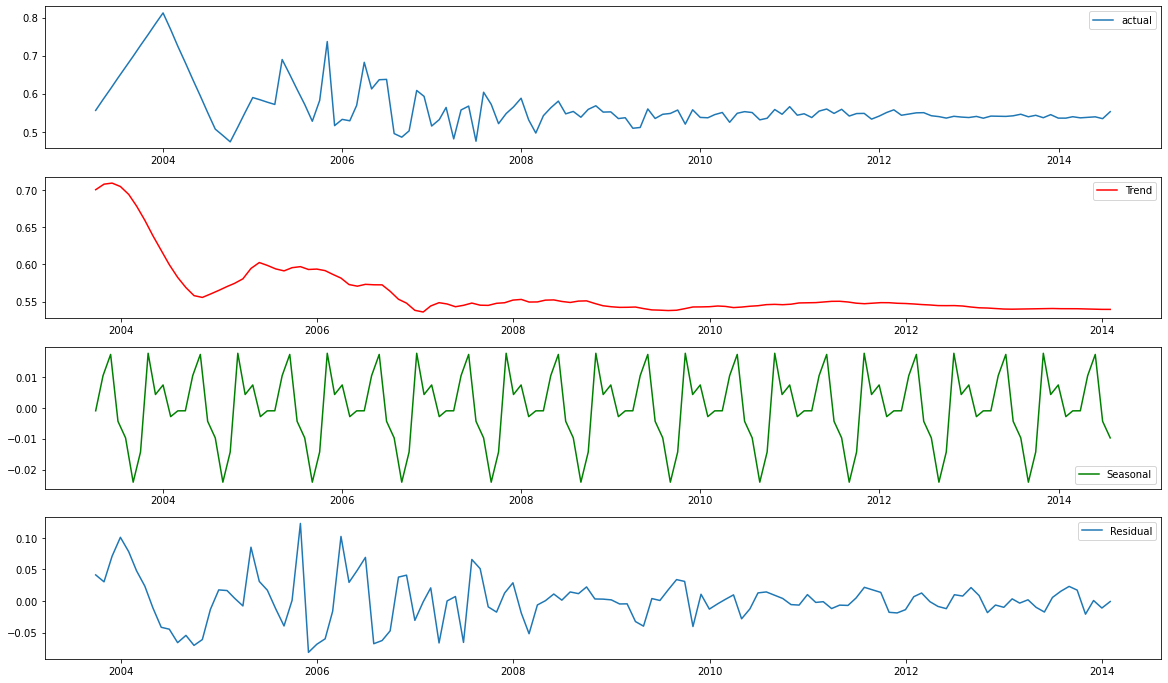

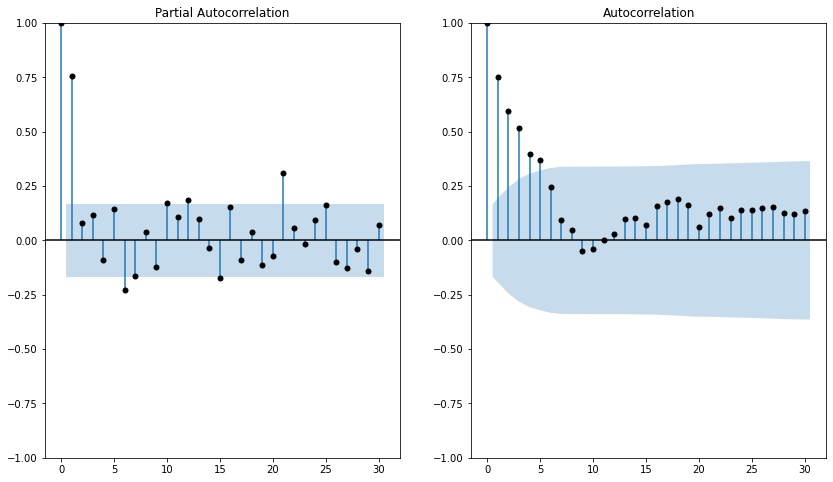

In [52]:
resample(df1,30)

In [53]:
bestvalue(4,0,5,3,0,4)#searching best value for p,d,q and P,D,Q with low rmse value

Min RMSE at index: 230
RMSE values for the models at index:  0 0.5795682934079347
RMSE values for the models at index:  1 0.3768466275861851
RMSE values for the models at index:  2 0.3109691876125488
RMSE values for the models at index:  3 0.28259497995863814
RMSE values for the models at index:  4 0.24131793736784862
RMSE values for the models at index:  5 0.23822747041002082
RMSE values for the models at index:  6 0.2385803173580996
RMSE values for the models at index:  7 0.2388282121266237
RMSE values for the models at index:  8 0.23951820101027688
RMSE values for the models at index:  9 0.23859515427301117
RMSE values for the models at index:  10 0.24010984796419788
RMSE values for the models at index:  11 0.23846374854695862
RMSE values for the models at index:  12 0.31444076140580196
RMSE values for the models at index:  13 0.21039499044695945
RMSE values for the models at index:  14 0.17933953439894224
RMSE values for the models at index:  15 0.16721527268168473
RMSE values for 

Model status : Good model

Length of predict data: 42
RMSE value for the model: 0.00012449279750346894


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                         SARIMAX Results                                        
 Dep. Variable:                                compound   No. Observations:                   95
 Model:             SARIMAX(2, 0, 4)x(0, 0, [1, 2], 30)   Log Likelihood                 153.827
 Date:                                 Wed, 07 Dec 2022   AIC                           -285.655
 Time:                                         08:38:49   BIC                           -257.562
 Sample:                                     03-31-2003   HQIC                          -274.303
                                           - 01-31-2011                                         
 Covariance Type:                                   opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1           

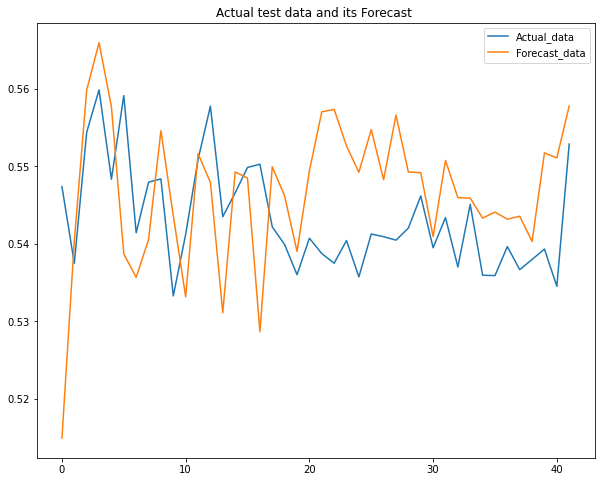

In [54]:
sarimax1(2,0,4,0,0,2,30) #building model with (p,d,q,P,D,Q,lag) values

2014-08-31    0.513186
2014-09-30    0.526939
2014-10-31    0.566666
2014-11-30    0.549244
2014-12-31    0.510853
2015-01-31    0.561064
2015-02-28    0.509919
2015-03-31    0.511649
2015-04-30    0.544950
2015-05-31    0.523279
2015-06-30    0.567684
2015-07-31    0.534694
2015-08-31    0.542844
Freq: M, Name: predicted_mean, dtype: float64


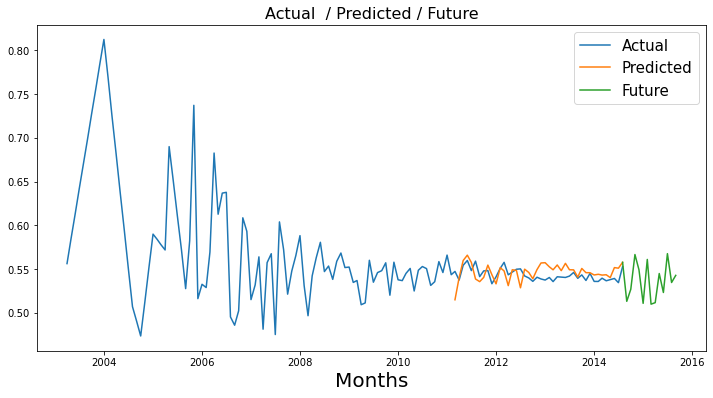

In [55]:
#Done future forecast of data we had given for resample
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:55])
print(fcast3)

#Plot actual,predicted forecast and future forecast data
Futureplot(41) #using ploting function for ploting graphs with last pred value to reduce the gap btw pred and future forecast.

## For negative data

Pvalue for data 0.0014508732602532565
Data is stationary. Proceed to model building

Pvalue for data 0.0
Seasonal Data is stationary. Proceed to model building

70% train data=70,30% test data=30
70% train data=70,30% test data=30


(             overall      price  helpful_ratio  compound
 reviewTime                                              
 2006-04-30  1.000000  25.000000       1.000000 -0.476700
 2006-05-31  3.666667  33.000000       5.333333 -0.471367
 2006-06-30  4.111111  30.333333       3.888889 -0.348478
 2006-07-31  4.555556  27.666667       2.444444 -0.225589
 2006-08-31  5.000000  25.000000       1.000000 -0.102700
 ...              ...        ...            ...       ...
 2014-03-31  2.676600  22.815673       0.215394 -0.360995
 2014-04-30  2.609234  25.442568       0.186063 -0.363681
 2014-05-31  2.621315  24.130385       0.149414 -0.360758
 2014-06-30  2.665006  23.378580       0.152408 -0.371019
 2014-07-31  2.643863  23.561368       0.040241 -0.370319
 
 [100 rows x 4 columns],
 reviewTime
 2006-04-30   -0.476700
 2006-05-31   -0.471367
 2006-06-30   -0.348478
 2006-07-31   -0.225589
 2006-08-31   -0.102700
                 ...   
 2014-03-31   -0.360995
 2014-04-30   -0.363681
 2014-05-31   -

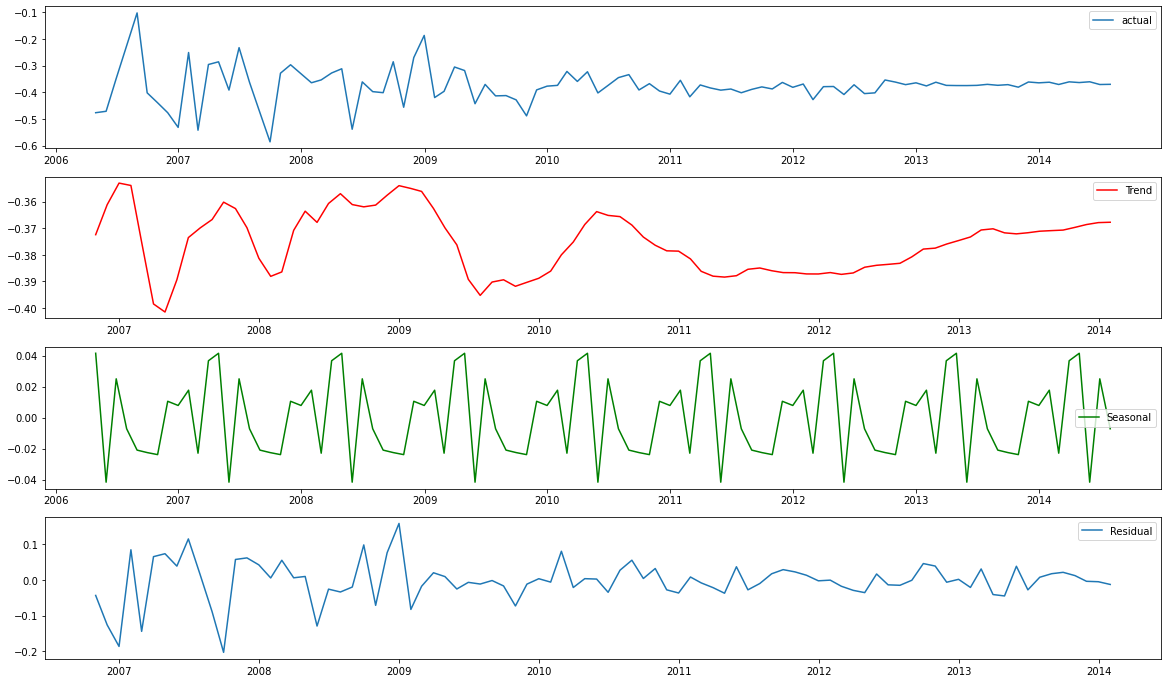

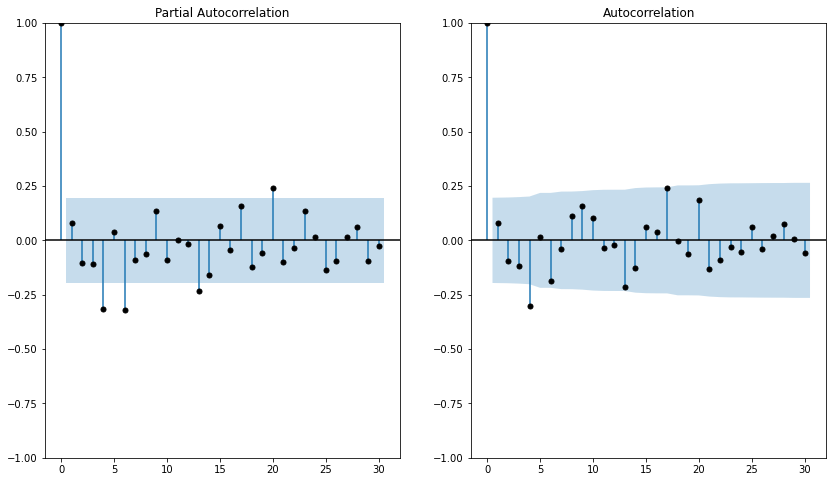

In [56]:
resample(df2,30)

In [57]:
bestvalue(4,0,2,4,0,3)

Min RMSE at index: 44
RMSE values for the models at index:  0 0.38347381243471707
RMSE values for the models at index:  1 0.2698263636136936
RMSE values for the models at index:  2 0.21933668905024498
RMSE values for the models at index:  3 0.17614293204323148
RMSE values for the models at index:  4 0.1701836143678302
RMSE values for the models at index:  5 0.16917544581642763
RMSE values for the models at index:  6 0.1686734511416349
RMSE values for the models at index:  7 0.16866987138743952
RMSE values for the models at index:  8 0.16867027952369995
RMSE values for the models at index:  9 0.16866990517139838
RMSE values for the models at index:  10 0.16867353261033607
RMSE values for the models at index:  11 0.16870628875996715
RMSE values for the models at index:  12 0.23239345103650505
RMSE values for the models at index:  13 0.1919163978428269
RMSE values for the models at index:  14 0.16306716883053254
RMSE values for the models at index:  15 0.1582379115361293
RMSE values for t

Model status : Good model

Length of predict data: 30
RMSE value for the model: 0.000342515336813055


-----------------------------------------Model Summary:---------------------------------------------



(<class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:                           compound   No. Observations:                   70
 Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 11)   Log Likelihood                  84.533
 Date:                            Wed, 07 Dec 2022   AIC                           -155.065
 Time:                                    08:39:52   BIC                           -139.326
 Sample:                                04-30-2006   HQIC                          -148.814
                                      - 01-31-2012                                         
 Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 x1             0.0620      0.011      5.427      0.00

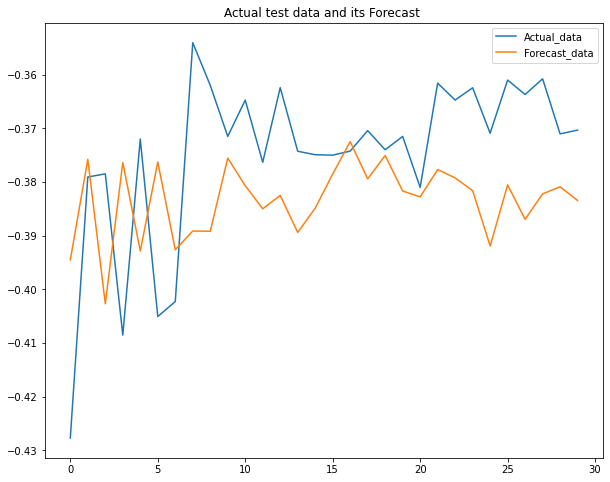

In [58]:
sarimax1(1,0,1,1,0,1,11)

2014-08-31   -0.363071
2014-09-30   -0.323976
2014-10-31   -0.360216
2014-11-30   -0.343653
2014-12-31   -0.375082
2015-01-31   -0.397465
2015-02-28   -0.384953
2015-03-31   -0.362807
2015-04-30   -0.387004
2015-05-31   -0.437739
2015-06-30   -0.402963
2015-07-31   -0.381619
2015-08-31   -0.393276
Freq: M, Name: predicted_mean, dtype: float64


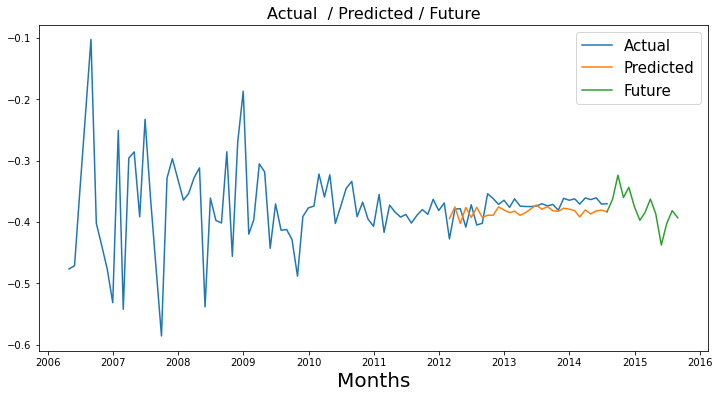

In [59]:
fcast3 = m1.predict(start=len(data_w), end=len(data_w)+12,exog=exog_train[:43])
print(fcast3)
Futureplot(29)

In [60]:
def wordcloud(df):
    stopwords = set(STOPWORDS)
    for val in df['summary']: 
    # typecaste each val to string
        val = str(val)
 
    # split the value
        tokens = val.split()
     
    # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
     
    #comment_words += " ".join(tokens)+" "

    words = " ".join(sent for sent in df['summary'])
    wordcloud = WordCloud(width=800, height=500, random_state=42,stopwords = stopwords, max_font_size=100).generate(words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title(name,fontsize=25)
    plt.show()

In [61]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


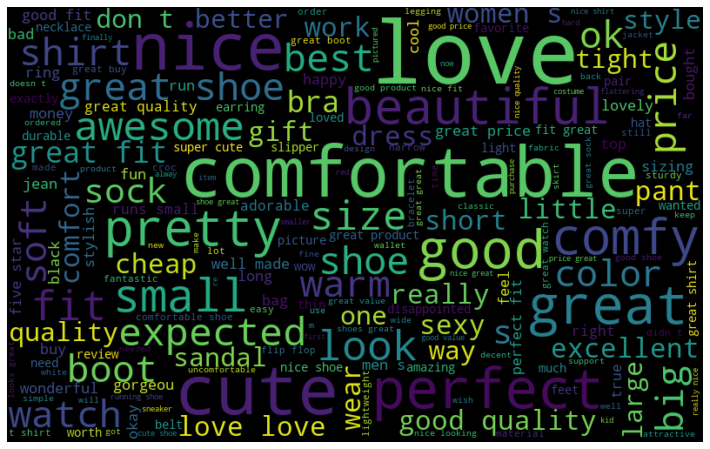

In [62]:
wordcloud(df)

### Solution for business improvement.


There are some loyal customer  who wants to chunk out. 
       Sarah , Amy ,Gissica , Jen

This customer should be given some special attention because this customer are regular to our website.

The product which are worst and having most negative review should be taken some action on them for improvement or stop promoting them on their selling portal.

     6 pack soft tip infant spoon, Little snugabunny,Rainforest Jumperoo,Giraffee Teether

The company should increase the product inventory the product which are highly recommended by the customer on their previous experience some of the products are
	Manual Breast pump, Nasal Aspirator, Newborn gift set, Strap Cover, Crozy cart 

It seems that from period of October to January their highest sales so seller should store bulk stock in their inventory
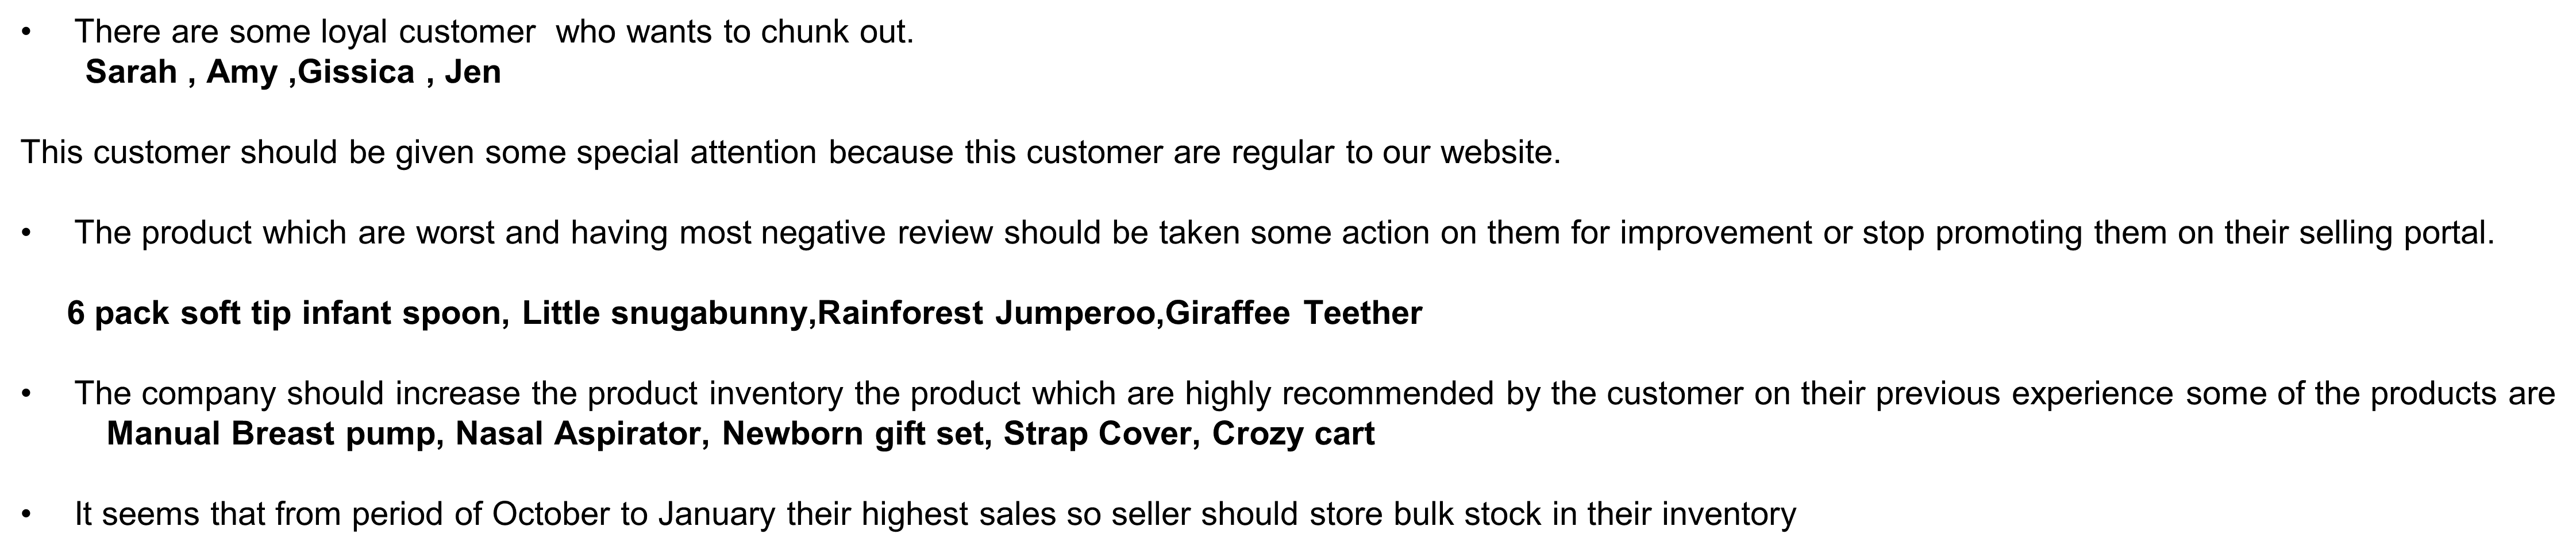